In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 16.6 MB/s eta 0:00:00


In [ ]:
!pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

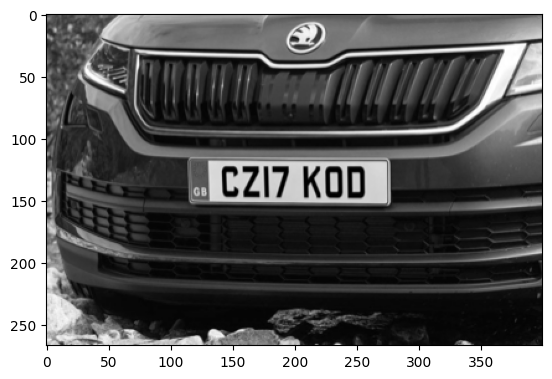

In [ ]:
img=cv2.imread('/content/drive/MyDrive/project_sayantan/vehicle_numberplate/images/Cars109.png')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_img,cv2.COLOR_BGR2RGB))
#plt.imshow(gray_img)


#APPLY FILTERING (to remove noise from the image) and find edges for localization

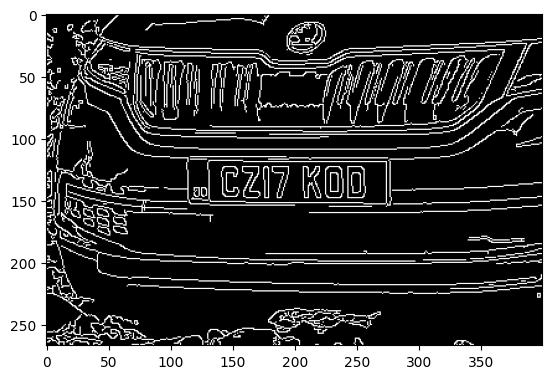

In [ ]:
blatfilter=cv2.bilateralFilter(gray_img,11,17,17)
edge_detct=cv2.Canny(blatfilter,30,200)
plt.imshow(cv2.cvtColor(edge_detct,cv2.COLOR_BGR2RGB))

#Contour detection(contour of four points, ideally a rectangle most likely a shape of the number plate) and apply Mask

In [ ]:
keypoints=cv2.findContours(edge_detct,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
countours=imutils.grab_contours(keypoints)
contours=sorted(countours,key=cv2.contourArea,reverse=True)[:10]
contours

[array([[[392,  81]],
 
        [[389,  84]],
 
        [[388,  84]],
 
        [[383,  89]],
 
        [[383,  90]],
 
        [[382,  91]],
 
        [[382,  92]],
 
        [[379,  95]],
 
        [[378,  95]],
 
        [[376,  93]],
 
        [[375,  94]],
 
        [[373,  94]],
 
        [[372,  93]],
 
        [[371,  93]],
 
        [[370,  94]],
 
        [[363,  94]],
 
        [[362,  95]],
 
        [[361,  95]],
 
        [[359,  97]],
 
        [[358,  97]],
 
        [[357,  98]],
 
        [[356,  98]],
 
        [[353, 101]],
 
        [[352, 101]],
 
        [[350, 103]],
 
        [[349, 103]],
 
        [[347, 105]],
 
        [[346, 105]],
 
        [[343, 108]],
 
        [[341, 108]],
 
        [[339, 110]],
 
        [[338, 110]],
 
        [[337, 111]],
 
        [[336, 111]],
 
        [[335, 112]],
 
        [[333, 112]],
 
        [[332, 113]],
 
        [[330, 113]],
 
        [[329, 114]],
 
        [[326, 114]],
 
        [[325, 115]],
 
        [[318, 1

In [ ]:
location=None
for contor in contours:
  apprx=cv2.approxPolyDP(contor,10,True)
  if(len(apprx)==4):
    location=apprx
    break

In [ ]:
location

array([[[130, 120]],

       [[273, 119]],

       [[274, 152]],

       [[133, 151]]], dtype=int32)

#Easy ocr to detect text from image

In [ ]:
mask_img=np.zeros(gray_img.shape,np.uint8)
new_img=cv2.drawContours(mask_img,[location],0,255,-1)
new_img=cv2.bitwise_and(img,img,mask=mask_img)


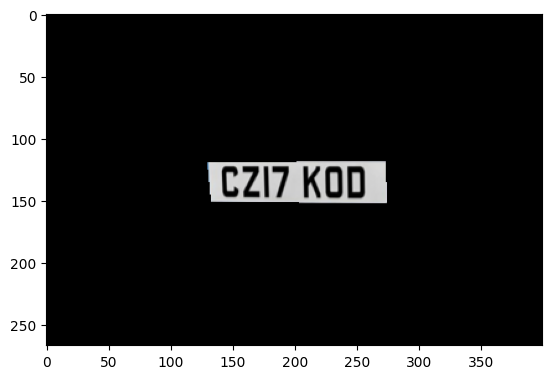

In [ ]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)=np.where(mask_img==255)
(x1, y1)=(np.min(x),np.min(y))
(x2, y2)=(np.max(x),np.max(y))
cropped_img=new_img[x1:x2+1,y1:y2+1]


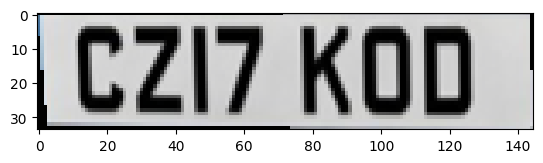

In [ ]:
plt.imshow(cv2.cvtColor(cropped_img,cv2.COLOR_RGB2BGR))

#OCR read text from the image

In [ ]:
readocr=easyocr.Reader(['en'])
result_img=readocr.readtext(cropped_img)
result_img

[([[7, 1], [133, 1], [133, 34], [7, 34]], 'Cziz kod', 0.31556518586339133)]

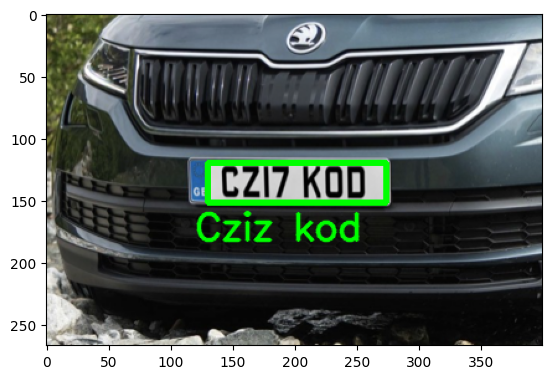

In [ ]:
text = result_img[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.rectangle(img, tuple(apprx[0][0]), tuple(apprx[2][0]), (0, 255, 0), 3)
text_position = (apprx[0][0][1], apprx[2][0][1] + 30)
res = cv2.putText(res, text=text, org=text_position, fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
text

'PGeUN1L2'

In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract